# Notebook Objective<a id='Notebook Objective'></a>
In this notebook we'll be exporing KMeans clustering as a model for our cleaned happiness survey data.

Kmeans is not the final model. It's being used here to gain more insight into the data.

In [1]:
#import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mode

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



from yellowbrick.cluster import KElbowVisualizer


sns.set_palette('bright')



In [2]:
#import cleaned_data for modeling

df_global = pd.read_csv('../data/interim/cleaned_data.csv', index_col = 0)

In [3]:
df_global.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


# Prep Data and Scale<a id='K-means model for global data'></a>

In [4]:
#Remove categorical variables from the data
df_global_numerical = df_global.drop(columns = ['Country Name', 'Regional Indicator','Year'])

In [5]:
df_global_numerical.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [6]:
#Scale data using standard scaler
scaler = StandardScaler()
df_global_numerical_scaled = scaler.fit_transform(df_global_numerical)

# Determine the optimal K for KMeans Model<a id='Determine the optimal K for KMeans Model'></a>

Below we'll use the Yellowbrick visualizer to determine a good starting point for our number of clusters within the KMeans() model. 
The visualizer offers 3 'elbow' scoring methods: "distortion", "calinski_harabasz" and "silhouette" 
We'll look at all 3 methods and see if they agree

## Elbow Method - Distortion <a id='Elbow Method - Distortion '></a>

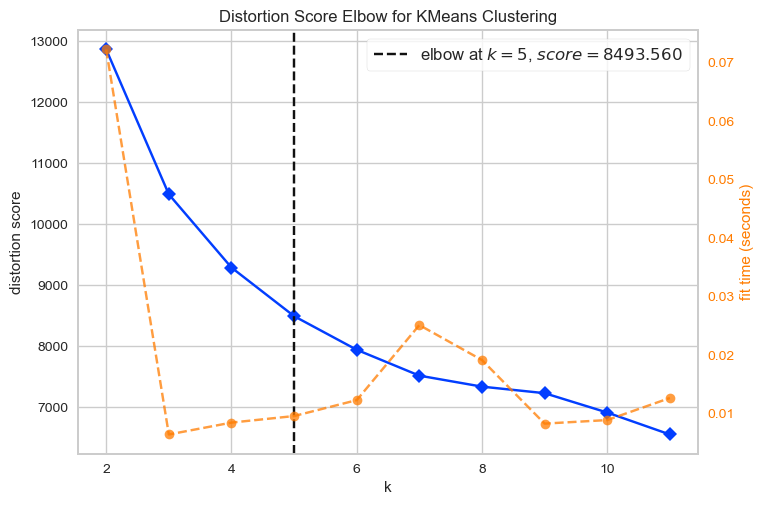

In [7]:
#Instantiate the model and visualizer
model_elbow = KMeans(random_state=42, n_init='auto')
visualizer_elbow = KElbowVisualizer(model_elbow, k=(2,12))

# Fit the data to the visualizer and render the figure
visualizer_elbow.fit(df_global_numerical_scaled)        
visualizer_elbow.show(); 

The distortion score measures the within cluster sum of squares (WCSS), giving us an idea of how tightly the points in the clusters are grouped around the centoid.
A higher score means the points are less tightly clustered. 
Using the elbow method, the visualizer above is pointing to the number of clusters after which the decrease in WCSS begins to slow down. 
This is the point of diminishing returns at which adding more clusters doesn't result in a significant decrease in WCSS.

The above is telling us that 5 clusters is optimal for this data set. Although visually it looks like 6 could also be acceptable. 
We'll go with 5 as the recommendation. 

## Elbow Method - calinski_harabasz <a id='Elbow Method - calinski_harabasz'></a>

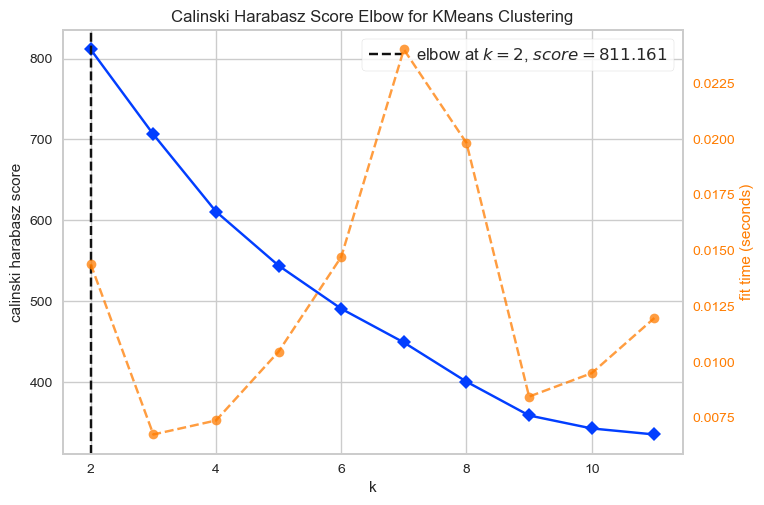

In [8]:
#Instantiate the model and visualizer
model_calinski_harabasz = KMeans(random_state=42, n_init='auto')
visualizer_calinski_harabasz = KElbowVisualizer(model_calinski_harabasz, k=(2,12), metric = 'calinski_harabasz')

# Fit the data to the visualizer and render the figure
visualizer_calinski_harabasz.fit(df_global_numerical_scaled)       
visualizer_calinski_harabasz.show();       

The Calinski Harabasz score tells us the reatio of between cluster variance to within cluster variance. A higher score indicates that the clusters are better defined and separated. 
Here we see that the number of clusters with the best definition and separatation is actually 2. The 5 clusters that the distortion score suggested is well below optimal on the Calinski score. 
This would seem to indicate that 5 clusters will give us better grouping around the cluster center for each cluster, but 2 clusters will give us better definition and separation. 
We'll have to model both 2 and 5 clusters and see what makes sense given our data. 

## Elbow Method - silhouette <a id='Elbow Method - silhouette'></a>

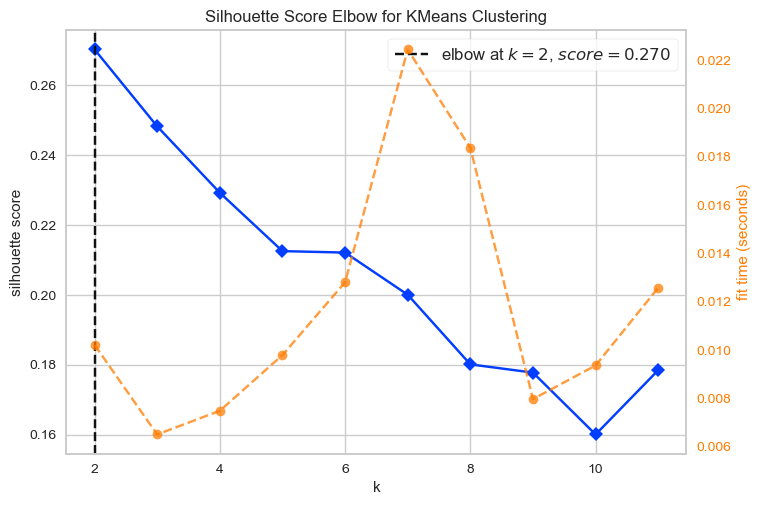

In [9]:
#Instantiate the model and visualizer
model_silhouette = KMeans(random_state=42, n_init='auto')
visualizer_silhouette = KElbowVisualizer(model_silhouette, k=(2,12), metric = 'silhouette')

# Fit the data to the visualizer and render the figure
visualizer_silhouette.fit(df_global_numerical_scaled)        
visualizer_silhouette.show();        

The Silhouette score calculates the average distances between points within clusters and between clusters. A higher score indicates better cluster definition.
Silhouette scores range from 1 to negative 1, with 1 indicating the clusters are spread very far apart and 0 indicating that the clusters are close together and may be sharing decision boundaries.
Again, our optimal score is just 2 clusters, which matches the Calinski score. However, the sillouette score at the maximum here is still only 0.27 or so. 
So there is some cluster separation, but we can't hope for a huge amount. 
We'll model 2 clusters and see how it compares with our data. 

# KMeans Model - 2 clusters<a id='KMeans Model - 2 clusters'></a>

In [10]:
#Instantiate and fit the KMeans model 2 clusters

kmeans_2 = KMeans(n_clusters = 2,n_init='auto', random_state=42)
kmeans_2.fit(df_global_numerical_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [11]:
#Get the labels from the model and add them to our data set

labels_2_df = pd.DataFrame(kmeans_2.labels_, columns = ['Kmeans_group'])

df_global_KMeans_2_labeled = pd.concat([df_global,labels_2_df], axis= 1)

df_global_KMeans_2_labeled.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Kmeans_group
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,1
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,1
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,1
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,1
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,1


# 2 clusters - Basic Analysis<a id='2 clusters - Basic Analysis'></a>

One of the keys to understanding the two clusters created by our model is understanding where the edges of the clusters are. It makes intuitive sense to think og countries like Britain and France being in one cluster, and countries like Afganistan being in the other. But are there countries who might fall into either cluster depending on the year the data was collected?

In [13]:
#How many countries have more than one label attached. 

countries_multi_labeled = []

for country in df_global_KMeans_2_labeled['Country Name'].unique():
    country_df = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Country Name']== country]
    labels = country_df['Kmeans_group'].unique()

    if len(labels) > 1: 
        countries_multi_labeled.append(country)

ratio = round((len(countries_multi_labeled)/len(df_global_KMeans_2_labeled['Country Name'].unique())*100),2)

In [21]:
print(f'{len(countries_multi_labeled)} countries or {ratio}% of the countries in the full data set have more than 1 label assigned.' + 
'\n'+ 'They can be in either cluster depending on the year the data was collected.')

print('\n')
print('Those counries are as follows:')

for item in countries_multi_labeled:
    print(item)

32 countries or 23.02% of the countries in the full data set have more than 1 label assigned.
They can be in either cluster depending on the year the data was collected.


Those counries are as follows:
Azerbaijan
Belarus
Bolivia
Bosnia and Herzegovina
Bulgaria
El Salvador
Greece
Honduras
Hungary
Indonesia
Jordan
Kazakhstan
Kosovo
Kyrgyzstan
Latvia
Lithuania
Moldova
Mongolia
Montenegro
Myanmar
Nicaragua
Peru
Philippines
Romania
Russia
Serbia
Slovakia
South Africa
South Korea
Sri Lanka
Ukraine
Venezuela


So a significant portion of the countries in our dataset seem to sit between the two main clusters. 
We might think of these are transitional countries, in the sense that they sit on, and help define the transition
between our two clusters. We'll make a separate dataframe containing these countries so that we can visualize them. 

In [24]:
#Create a dataframe for transitional countries

df_multi_label = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Country Name'].isin(countries_multi_labeled)]
df_multi_label.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Kmeans_group
81,Azerbaijan,Commonwealth of Independent States,2006,4.727871,9.154187,0.854415,60.580002,0.771528,-0.236623,0.774117,0.468756,0.275695,0.754707,1
82,Azerbaijan,Commonwealth of Independent States,2007,4.568160,9.365992,0.753247,60.860001,0.522046,-0.208600,0.870910,0.474291,0.284357,0.708405,1
83,Azerbaijan,Commonwealth of Independent States,2008,4.817189,9.447180,0.684267,61.139999,0.601043,-0.031348,0.715125,0.560818,0.226795,0.792291,1
84,Azerbaijan,Commonwealth of Independent States,2009,4.573725,9.515311,0.735970,61.419998,0.498138,-0.088785,0.753850,0.522002,0.233942,0.774252,1
85,Azerbaijan,Commonwealth of Independent States,2010,4.218611,9.552670,0.687001,61.700001,0.501071,-0.125315,0.858347,0.516272,0.271873,0.697391,1


Let's take a rough look at how the transitional countries move through time. Do they move back and forth between clusters?
Or are they steadily moving from one cluster to the other as time goes on? 

To avoid a crowded visaulization we'll look at a random subset, just to get an idea.

In [43]:
for i in range(8):
    index = np.random.randint(0,len(countries_multi_labeled))
    country = countries_multi_labeled[index]
    print(country)
    print(df_multi_label[df_multi_label['Country Name']== country]['Kmeans_group'].tolist())
    

Moldova
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
South Korea
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Lithuania
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Romania
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Myanmar
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Greece
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Myanmar
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Latvia
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


We can see at a glance that some of the countries in the transitional set move cleanly from one group to the other and that some 
bounce back and forth depending on the year. 

#### KMeans Model - 2 clusters - Label Analysis<a id='KMeans Model - 5 clusters - Label Analysis'></a>

In [44]:
labels = sorted(df_global_KMeans_2_labeled['Kmeans_group'].unique().tolist())

for label in labels:
    cluster_df = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Kmeans_group']==label]
    print(f"Cluster {label}:")
    print(f"Mean Life Ladder: {np.mean(cluster_df['Life Ladder'], axis=0)}")
    print(f"Median Life Ladder: {np.median(cluster_df['Life Ladder'], axis=0)}")
    print(f"Mode Life Ladder: {mode(cluster_df['Life Ladder'], axis=0)[0]}")
    print(f"Size: {len(cluster_df)}")
    print()

Cluster 0:
Mean Life Ladder: 6.377401526852261
Median Life Ladder: 6.32763958
Mode Life Ladder: 4.180569172
Size: 995

Cluster 1:
Mean Life Ladder: 4.543407407043224
Median Life Ladder: 4.5947067735000005
Mode Life Ladder: 2.375091791
Size: 856



In terms of the Life Ladder score (the target variable). We can see that Cluster 0 is significantly higher in all three measures of 
central tendancy. We're also seeing that the clusters are roughly the same size, which seems a good sign. It's important to remember that
we don't have equal data for all the countries in the data set, so some of the difference in cluster sizes may be explained by having fewer years
of data for the countries that fall into cluster 1 based on this model.

In [45]:
labels = sorted(df_global_KMeans_2_labeled['Kmeans_group'].unique().tolist())

for label in labels:
    cluster_df = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Kmeans_group']==label]
    print(f"Cluster {label}:")
    print(f"Size: {len(cluster_df)}")
    print(f"Mean Life Ladder: {np.mean(cluster_df['Life Ladder'], axis=0)}")
    print(f"Mean Log GDP Per Capita: {np.mean(cluster_df['Log GDP Per Capita'], axis=0)}")
    print(f"Mean Social Support: {np.mean(cluster_df['Social Support'], axis=0)}")
    print(f"Mean Healthy Life Expectancy At Birth: {np.mean(cluster_df['Healthy Life Expectancy At Birth'], axis=0)}")
    print(f"Mean Freedom To Make Life Choices: {np.mean(cluster_df['Freedom To Make Life Choices'], axis=0)}")
    print(f"Mean Generosity: {np.mean(cluster_df['Generosity'], axis=0)}")
    print(f"Mean Perceptions Of Corruption: {np.mean(cluster_df['Perceptions Of Corruption'], axis=0)}")
    print(f"Mean Positive Affect: {np.mean(cluster_df['Positive Affect'], axis=0)}")
    print(f"Mean Negative Affect: {np.mean(cluster_df['Negative Affect'], axis=0)}")
    print(f"Mean Confidence In National Government: {np.mean(cluster_df['Confidence In National Government'], axis=0)}")
    print('\n')
    
  

Cluster 0:
Size: 995
Mean Life Ladder: 6.377401526852261
Mean Log GDP Per Capita: 10.189193719853268
Mean Social Support: 0.8920469575944096
Mean Healthy Life Expectancy At Birth: 68.4288792843704
Mean Freedom To Make Life Choices: 0.8228770998351759
Mean Generosity: 0.028953121179332346
Mean Perceptions Of Corruption: 0.6888978999815424
Mean Positive Affect: 0.7134949398663317
Mean Negative Affect: 0.24450092787839198
Mean Confidence In National Government: 0.4602527385544799


Cluster 1:
Size: 856
Mean Life Ladder: 4.543407407043224
Mean Log GDP Per Capita: 8.461109492254673
Mean Social Support: 0.725158505067757
Mean Healthy Life Expectancy At Birth: 57.68741828143691
Mean Freedom To Make Life Choices: 0.6656053608539718
Mean Generosity: -0.024129227161659775
Mean Perceptions Of Corruption: 0.8124019884979946
Mean Positive Affect: 0.5987928618383207
Mean Negative Affect: 0.29609030517133955
Mean Confidence In National Government: 0.5024637444701576




Comparing the two clusters across all our features we can see again that Cluster 0 is characterized by higher scores in most areas. 
The only exception to this is the Confidence in National Government feature. Where Cluster 1 has a mean score that is slightly higher. 
It is a very slight difference of approximately 0.04, but it nevertheless goes against the overall trend.

Based on the above we can say that on average the countries that fall into Cluster 0 score higher across all except Confidence In National Government where they
tend to score almost the same. Again it's important to remember the bias in our data set when it comes to this particular metric. Multiple countries were dropped during the data cleaning phase because they had no information for Confidence In National Government. In some countries and in some years the question wasn't asked. That lack of data may be distorting this score.

Overall these clusters seem to be separated by degree, not by category. Cluster 0 countries can be thought of as Cluster 1 countries that have increased their scores across the board. If this is the case, the question becomes where that transition occurs. What score, or range of scores, characterze a country moving from one group to the other? 
We'll explore that question in more detail below.

# 2 clusters - Regional Characterization<a id='2 clusters - Regional Characterization'></a>

Before looking at how individual features breakdown, it might be interesting to look at how our two clusters break down in terms of regions. 
This will help tie the clusters to the real world and give us some additional insight into how the model's results might be reflecting reality (or not).

In [46]:
group_0_life_ladder = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Kmeans_group']== 0]
group_0_life_ladder_multi = group_0_life_ladder[~group_0_life_ladder['Country Name'].isin(countries_multi_labeled)]


group_1_life_ladder = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Kmeans_group']== 1]
group_1_life_ladder_multi = group_1_life_ladder[~group_1_life_ladder['Country Name'].isin(countries_multi_labeled)]

In [47]:

group_0_regions = {}
group_1_regions = {}
transitional_regions = {}

for region in group_0_life_ladder_multi['Regional Indicator'].unique():
    region_df = group_0_life_ladder_multi[group_0_life_ladder_multi['Regional Indicator']== region]
    group_0_regions[region] = region_df['Country Name'].unique()

for region in group_1_life_ladder_multi['Regional Indicator'].unique():
    region_df = group_1_life_ladder_multi[group_1_life_ladder_multi['Regional Indicator']== region]
    group_1_regions[region] = region_df['Country Name'].unique()

for region in df_multi_label['Regional Indicator'].unique():
    region_df = df_multi_label[df_multi_label['Regional Indicator']== region]
    transitional_regions[region] = region_df['Country Name'].unique()
    
 

In [48]:

regions_list = []
group_0_values = []
group_1_values = []
multi_group_values = []

for region in df_global['Regional Indicator'].unique():
    regions_list.append(region)
    try:
        group_0_values.append(len(group_0_regions[region]))
    except:
        group_0_values.append(0)
    try:
        group_1_values.append(len(group_1_regions[region]))
    except:
        group_1_values.append(0)
    try:
        multi_group_values.append(len(transitional_regions[region]))
    except:
        multi_group_values.append(0)

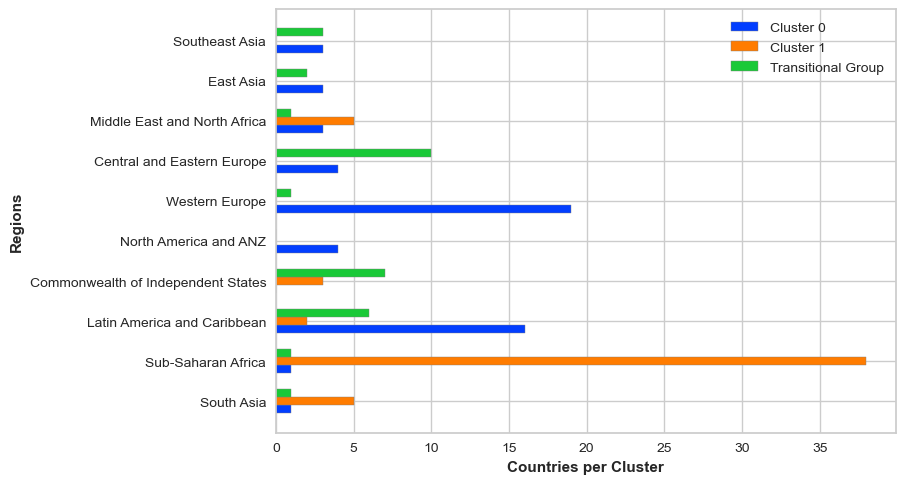

In [52]:
categories = regions_list
breakdown_labels = ['Cluster 0', 'Cluster 1', 'Transitional Group']
values = [group_0_values, group_1_values, multi_group_values]

# Setting up positions for bars
bar_width = 0.2
r1 = range(len(categories))
r2 = [y + bar_width for y in r1]
r3 = [y + bar_width for y in r2]

# Creating bars
#plt.barh(r1, values[0], color='b', height=bar_width, edgecolor='grey', label=breakdown_labels[0])
#plt.barh(r2, values[1], color='g', height=bar_width, edgecolor='grey', label=breakdown_labels[1])
#plt.barh(r3, values[2], color='r', height=bar_width, edgecolor='grey', label=breakdown_labels[2])

plt.barh(r1, values[0], height=bar_width, edgecolor='grey', label=breakdown_labels[0])
plt.barh(r2, values[1], height=bar_width, edgecolor='grey', label=breakdown_labels[1])
plt.barh(r3, values[2], height=bar_width, edgecolor='grey', label=breakdown_labels[2])

# Adding labels
plt.ylabel('Regions', fontweight='bold')
plt.xlabel('Countries per Cluster', fontweight='bold')
plt.yticks([r + bar_width for r in range(len(categories))], categories)

# Adding legend
plt.legend()

# Showing plot
plt.show()

It looks like Western Europe, North America and ANZ and to a lesser extent Latin America are characterized by Cluster 0 countries. These are countries with higher average scores across all metrics. In terms of the most important features (as identified in prerocessing and training for the RF model) this means that broadly speaking, these regions have countries with higher GDP, higher self reported life ladder scores and higher life expectancy and higher social support scores. 

Regions characterized by Cluster 1 include most notablly Sub-Saharan Africa, with South Asia and The Middle East and North Africa also showing significant numbers of countries in Cluster 1. These regions would then be characterized by lower average scores in the key features. Lower GDP, lower average self reported life ladder scores, lower life expectancy and lower social support scores. 

The remaining regions show a mix of groups, with significant numbers of transitional countries in Central and Eastern Europe and the Commonwealth of Independent States. 

It's important to keep in mind that the above is completely dependent on the underlying data set, which we know has some significant gaps in terms of coverage (see Data Wrangling and EDA Notebooks). However, it is notable that the broad findings here seem to reflect the real world in a general way. To take the obvious example we know that Sub-Saharan Africa is less developed than Western Europe economically, and we can see that in the data. This give some hope that the life ladder scores in the data reflect the real world in a general way as well. 

# 2 clusters - Visualization<a id='2 clusters - Visualization'></a>


## 2 clusters - Life Ladder comparison<a id='2 clusters - Life Ladder comparison'></a>

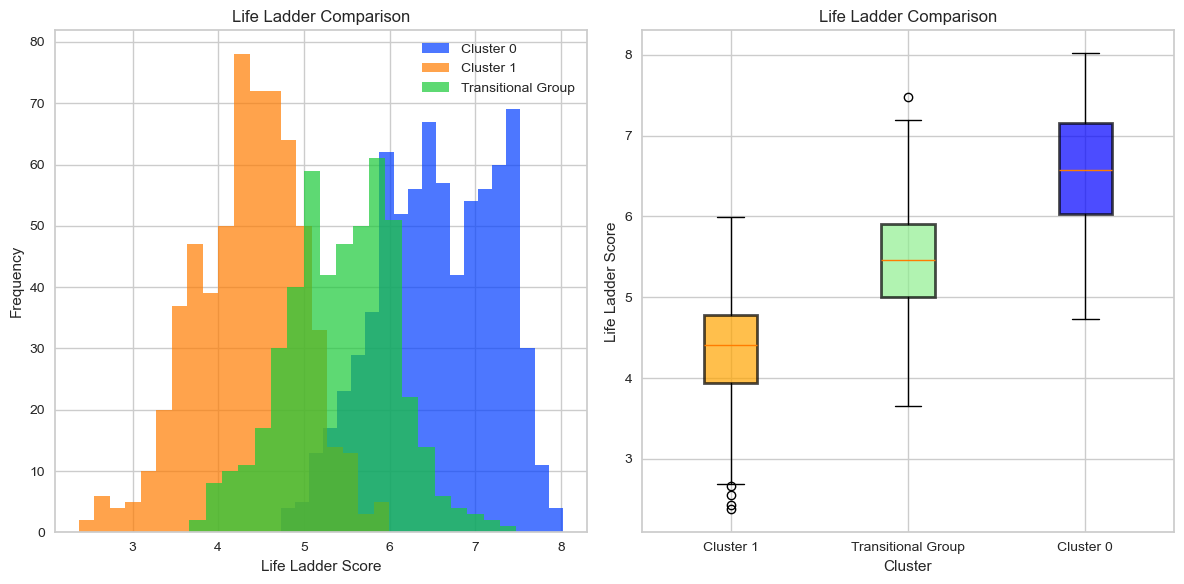

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(group_0_life_ladder_multi['Life Ladder'], bins=20,  alpha=0.7, label = 'Cluster 0')
axes[0].hist(group_1_life_ladder_multi['Life Ladder'], bins=20,  alpha=0.7, label = 'Cluster 1')
axes[0].hist(df_multi_label['Life Ladder'], bins=20,  alpha=0.7, label = 'Transitional Group')
    
axes[0].set_title('Life Ladder Comparison')
axes[0].set_xlabel('Life Ladder Score')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [group_1_life_ladder_multi['Life Ladder'],
        df_multi_label['Life Ladder'],
        group_0_life_ladder_multi['Life Ladder']]


# Labels for each group
box_plot_labels = ['Cluster 1','Transitional Group' ,'Cluster 0',]

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['orange','lightgreen','blue']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Life Ladder Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel("Life Ladder Score")


plt.tight_layout()

plt.show()

Looks like a good separation between clusters in terms of the Life Ladder Score generally speaking. 
The transitional countries are appearing right in the middle as expected.

Using a box plot we can more easily see where the transition between the two groups occurs. 
There is some overlap in the tails, but generally speaking we should expect to see countries with a life ladder score of between 5 and 6 starting to move
from one cluster to the other. 

Cluster 0 is characterized most scores being above 6. While Cluster 1 is characterized by most scores being between 4 and 5

## 2 clusters - Life Ladder vs. Log GPD<a id='2 clusters - Life Ladder vs. Log GPD'></a>

Below we create a scatter plot of our Log GPD and our Life ladder metric. Log GPD was identified as by far the most important feature when
modeling using an RF regressor, so looking at the interaction of this feature with out target variable seems worthwhile. 

In [57]:
#Descale the scaled data so that it's easier to visualize

descale = scaler.inverse_transform(df_global_numerical_scaled)

df_global_numerical_2_descaled = pd.DataFrame(descale, columns = ['Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'])

df_global_numerical_2_descaled.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [58]:
cluster_centers_descaler = scaler.inverse_transform(kmeans_2.cluster_centers_)

cluster_centers_2_descaled = pd.DataFrame(cluster_centers_descaler, columns = ['Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'])

cluster_centers_2_descaled.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,6.378441,10.189160,0.892080,68.430719,0.823144,0.029185,0.688678,0.713559,0.244501,0.460435
1,4.544342,8.463165,0.725314,57.697818,0.665479,-0.024336,0.812513,0.598853,0.296030,0.502203


In [71]:
#Create a separate "Hue" column for the transitional countries so that they will stand out
df_multi_label['hue'] = 'hue'

#transitional_group_descaled = df_global_numerical_2_descaled[df_global_numerical_2_descaled['']]

/var/folders/wk/9x4cvkhj61g2ldtvc6ss48wc0000gn/T/ipykernel_15995/1263602865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_label['hue'] = 'hue'


In [72]:
df_multi_label.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Kmeans_group,hue
81,Azerbaijan,Commonwealth of Independent States,2006,4.727871,9.154187,0.854415,60.580002,0.771528,-0.236623,0.774117,0.468756,0.275695,0.754707,1,hue
82,Azerbaijan,Commonwealth of Independent States,2007,4.568160,9.365992,0.753247,60.860001,0.522046,-0.208600,0.870910,0.474291,0.284357,0.708405,1,hue
83,Azerbaijan,Commonwealth of Independent States,2008,4.817189,9.447180,0.684267,61.139999,0.601043,-0.031348,0.715125,0.560818,0.226795,0.792291,1,hue
84,Azerbaijan,Commonwealth of Independent States,2009,4.573725,9.515311,0.735970,61.419998,0.498138,-0.088785,0.753850,0.522002,0.233942,0.774252,1,hue
85,Azerbaijan,Commonwealth of Independent States,2010,4.218611,9.552670,0.687001,61.700001,0.501071,-0.125315,0.858347,0.516272,0.271873,0.697391,1,hue


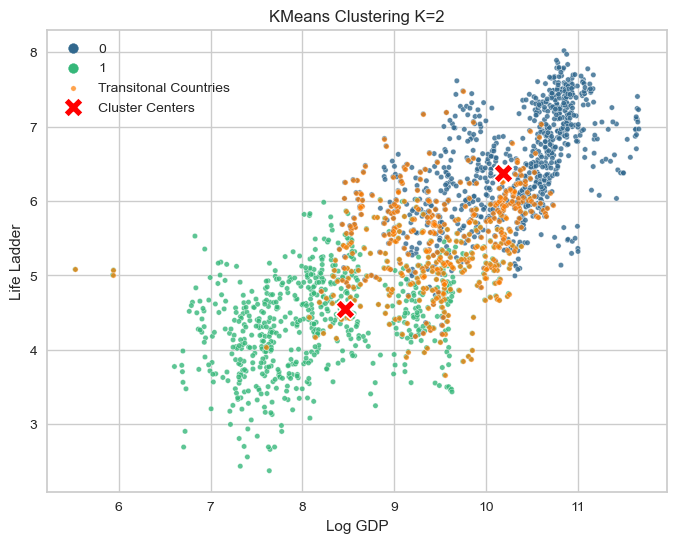

In [116]:
'''Life Ladder	Log GDP Per Capita	Social Support	Healthy Life Expectancy At Birth	Freedom To Make Life Choices	Generosity	Perceptions Of Corruption	Positive Affect	Negative Affect	Confidence In National Government'''


plt.figure(figsize=(8, 6))

# Scatter plot of data points with colors representing clusters
sns.scatterplot(x=df_global_numerical_2_descaled['Log GDP Per Capita'], y=df_global_numerical_2_descaled['Life Ladder'], hue=kmeans_2.labels_, palette='viridis', s=15, alpha=0.8)
#sns.scatterplot(x=descale[:, 0], y=descale[:, 1], hue=kmeans.labels_, palette='viridis', s=15, alpha=0.8)

sns.scatterplot(x=df_multi_label['Log GDP Per Capita'], y=df_multi_label['Life Ladder'], hue= None, s=15, alpha=0.7, label = 'Transitonal Countries')


# Plot cluster centers
sns.scatterplot(x=cluster_centers_2_descaled['Log GDP Per Capita'], y=cluster_centers_2_descaled['Life Ladder'],
                color='red', marker='X', s=200, label='Cluster Centers')

plt.title('KMeans Clustering K=2')
plt.xlabel('Log GDP')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()

A messy picture here, there are a lot of outliers, particularly on the left of the plot. Broadly speaking however, the interaction
between Life Ladder and Log GDP seems to support the idea that there is a positve correlation and that there is a rough boundary between the clusters
where countries might switch between groups depending on the socroe for a particular year. 

## 2 clusters - Major Features comparison<a id='2 clusters - Major Features comparison'></a>

The below historgrams will compare the two clusters based on the four features that were 
found to be most important during the preprocessing and modeling step for our random forest model. 

These features are:

Log GDP Per Capita	

Healthy Life Expectancy At Birth

Social Support	

Positive Affect

Countries in the Cluster 0 and Cluster 1 groups below are countries that fell into those clusters every year we have data for. 
Transitional countries are countries that moved between the clusters depending on the year. 

### 2 clusters - Log GDP comparison<a id='2 clusters - Log GDP comparison'></a>

In [87]:
#Prepare the dataframes for visualization
df_0 = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Kmeans_group']== 0]
#Remove the transitional countries from the dataframe
df_0_exclusive = df_0[~df_0['Country Name'].isin(countries_multi_labeled)]


df_1 = df_global_KMeans_2_labeled[df_global_KMeans_2_labeled['Kmeans_group']== 1]
#Remove the transitional countries from the dataframe
df_1_exclusive = df_1[~df_1['Country Name'].isin(countries_multi_labeled)]



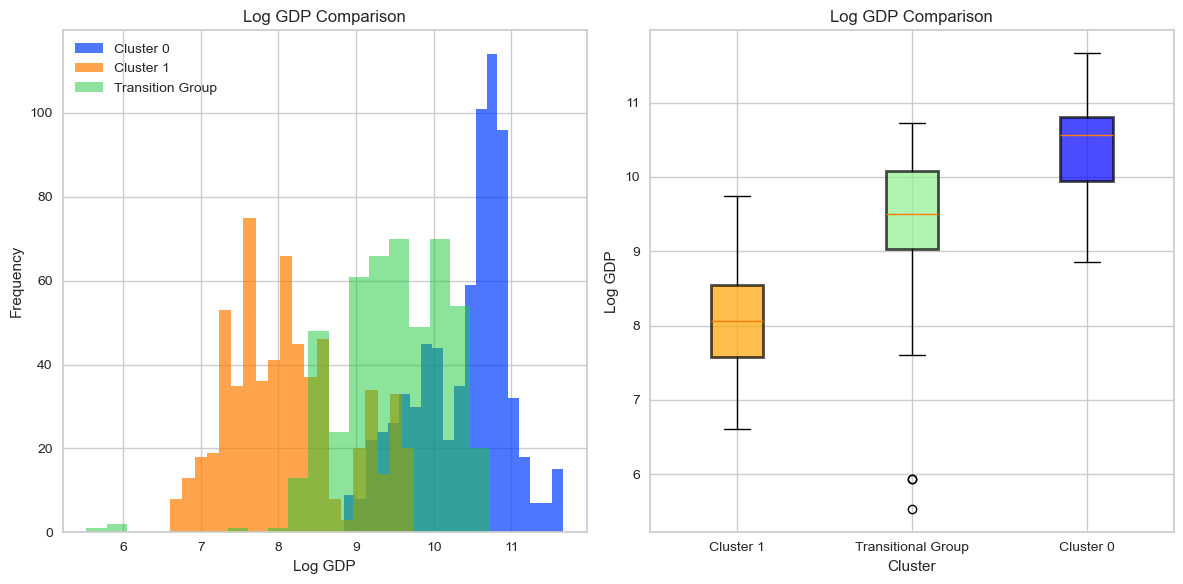

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(df_0_exclusive['Log GDP Per Capita'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(df_1_exclusive['Log GDP Per Capita'], bins=20,  alpha=0.7, label = 'Cluster 1')
axes[0].hist(df_multi_label['Log GDP Per Capita'], bins=20,  alpha=0.5, label = 'Transition Group')
    
axes[0].set_title(f'Log GDP Comparison')
axes[0].set_xlabel("Log GDP")
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [df_1_exclusive['Log GDP Per Capita'],
        df_multi_label['Log GDP Per Capita'],
        df_0_exclusive['Log GDP Per Capita']]


# Labels for each group
box_plot_labels = ['Cluster 1','Transitional Group' ,'Cluster 0',]

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['orange','lightgreen','blue']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Log GDP Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log GDP')


plt.tight_layout()

plt.show()

Again a decent separation between clusters with the transitional countries appearing in the middle. 
In terms of log GDP, we can say that Cluster 1 countries are characterized by a median LOG GPD of about 8, 
with most scores falling between roughly 7.5 and 8.5.

Cluster 0 countries are typically charaterized by scores falling between 10 and 11. With a median right around 10.5

Transitional countries fall solidly between 9 and 10.

### 2 clusters - Healthy Life Expectancy Comparison<a id='2 clusters - Healthy Life Expectancy Comparison'></a>

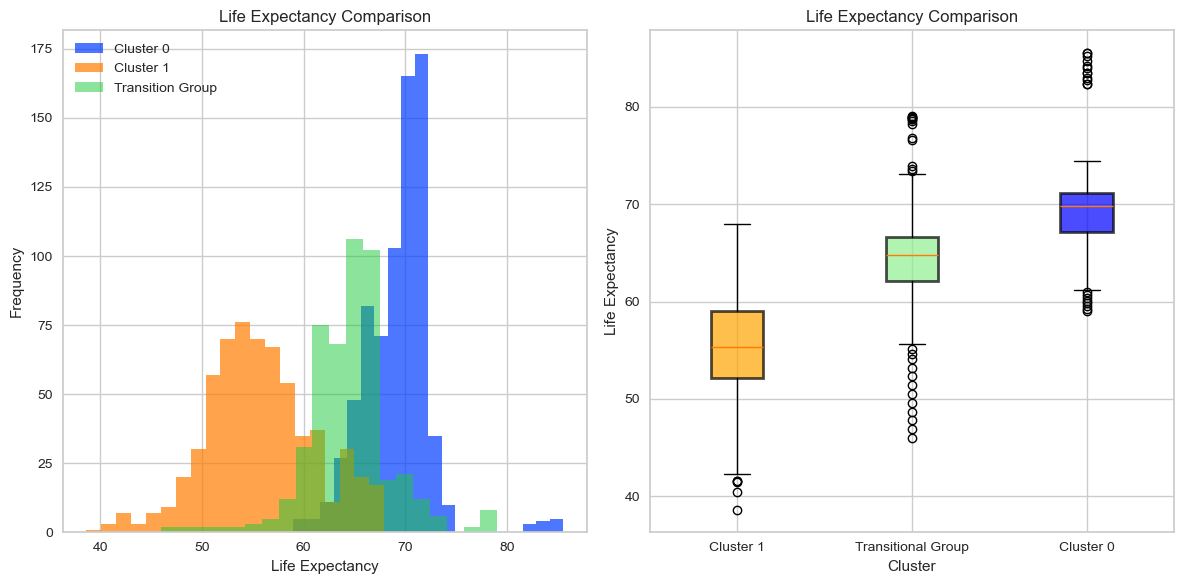

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(df_0_exclusive['Healthy Life Expectancy At Birth'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(df_1_exclusive['Healthy Life Expectancy At Birth'], bins=20,  alpha=0.7, label = 'Cluster 1')
axes[0].hist(df_multi_label['Healthy Life Expectancy At Birth'], bins=20, alpha=0.5, label = 'Transition Group')
    
axes[0].set_title(f'Life Expectancy Comparison')
axes[0].set_xlabel("Life Expectancy")
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [df_1_exclusive['Healthy Life Expectancy At Birth'],
        df_multi_label['Healthy Life Expectancy At Birth'],
        df_0_exclusive['Healthy Life Expectancy At Birth']]


# Labels for each group
box_plot_labels = ['Cluster 1','Transitional Group' ,'Cluster 0',]

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['orange','lightgreen','blue']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Life Expectancy Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel("Life Expectancy")


plt.tight_layout()

plt.show()

We're seeing similar separation here as with the features above but we're also seeing a lot more outliers. 
We've seen previously that LOG GDP and life expectancy are correlated, which makes intuitive sense when we think that
a generally stronger economy would tend to drive better medical treatment and health outcomes. 

The outliers here start to show the limits of that idea. The LOG GDP groups were pretty clearly separated in terms of central tendency with very few outliers. 
Here we see significant outliers in the transitional group and Cluster 0 countries. 
This would seem to indicate that a significant number of countries or either over or  under performing on the life expectancy metric compared to what we
might expect given their economics. 

Outliers aside, we're still seeing spearation here. With Group 1 generally characterized by life expectancy between 50 and 60 years. 
Transitional countries would generally have a life expectancy of between 60 and 70 years and Cluster 0 countries are characterised by 
life expectancies in the high 70's and low 80's with several outliers well above 80.

### 2 clusters - Social Support Comparison<a id='2 clusters - Social Support Comparison'></a>

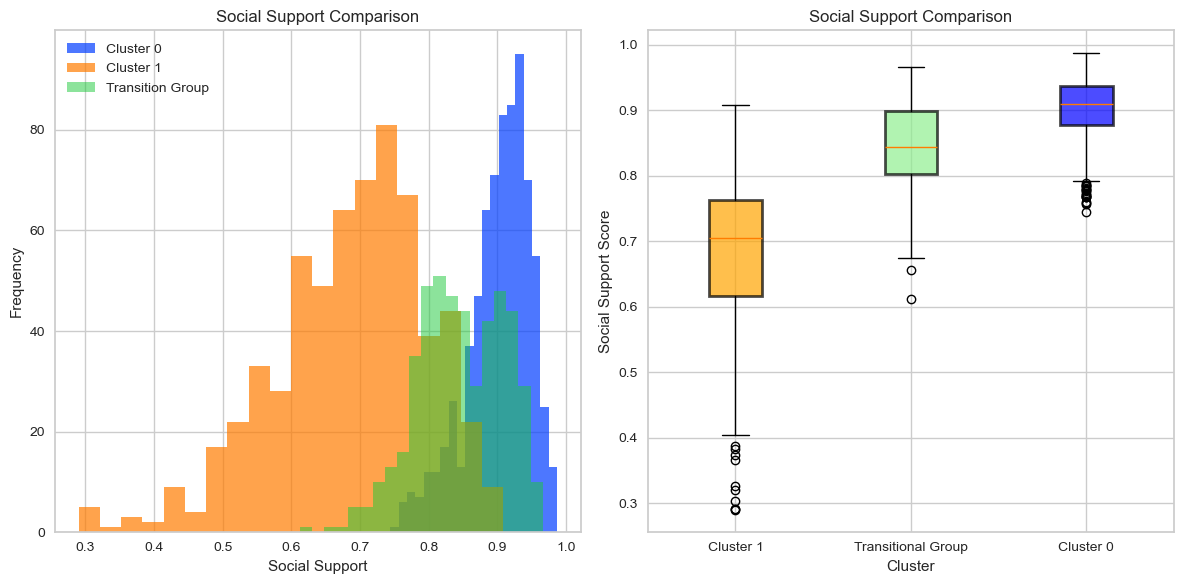

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(df_0_exclusive['Social Support'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(df_1_exclusive['Social Support'], bins=20,  alpha=0.7, label = 'Cluster 1')
axes[0].hist(df_multi_label['Social Support'], bins=20, alpha=0.5, label = 'Transition Group')
    
axes[0].set_title(f'Social Support Comparison')
axes[0].set_xlabel('Social Support')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [df_1_exclusive['Social Support'],
        df_multi_label['Social Support'],
        df_0_exclusive['Social Support']]


# Labels for each group
box_plot_labels = ['Cluster 1','Transitional Group' ,'Cluster 0',]

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['orange','lightgreen','blue']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Social Support Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Social Support Score')


plt.tight_layout()

plt.show()

The social support score is calcualted as the "national average of the binary responses (0=no, 1=yes) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

In this sense it's a very broad measure of social support networks. Again, we're seeing separation between groups, with Cluster 1 chracterized by scores between about 0.65 and 0.75. The median appears to fall right around 7. There is a long tail towards the lower end of the scale and several outliers on the low end as well for Cluster 1.

The transitional Group is characterized by social support scores between 0.8 and 0.9 with a median around 8.4. 
Unlike in the other features, here we see the middle two quartiles of the transtional group overlapping with Cluster 0 which is characterized by a median of about 0.9.

### 2 clusters - Positive Affect Comparison<a id='2 clusters - Positive Affect Comparison'></a>

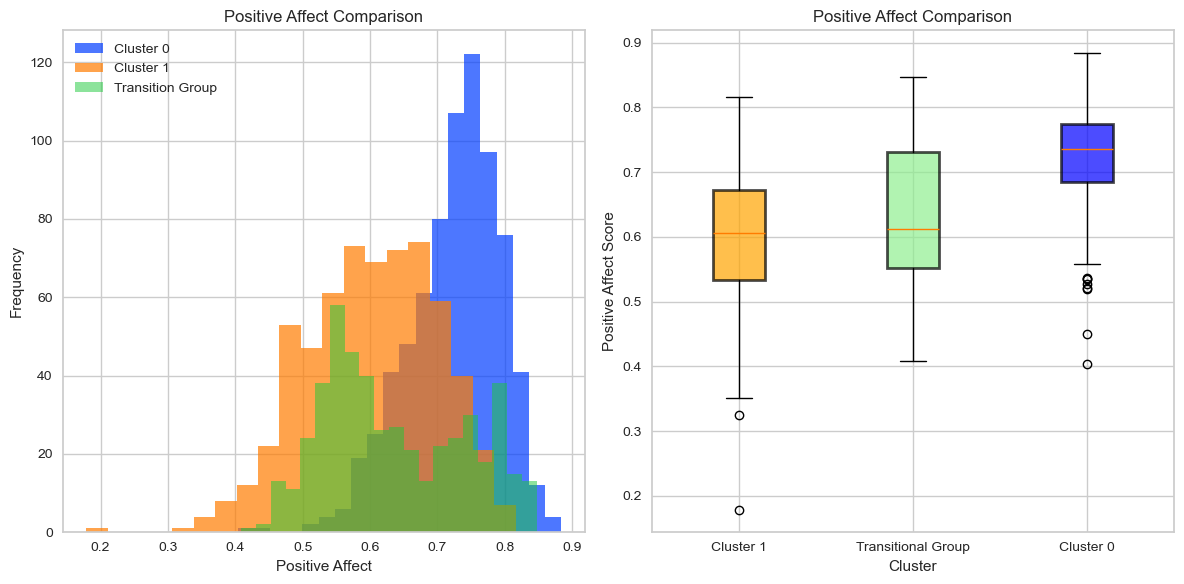

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(df_0_exclusive['Positive Affect'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(df_1_exclusive['Positive Affect'], bins=20,  alpha=0.7, label = 'Cluster 1')
axes[0].hist(df_multi_label['Positive Affect'], bins=20,  alpha=0.5, label = 'Transition Group')
    
axes[0].set_title(f'Positive Affect Comparison')
axes[0].set_xlabel('Positive Affect')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [df_1_exclusive['Positive Affect'],
        df_multi_label['Positive Affect'],
        df_0_exclusive['Positive Affect']]


# Labels for each group
box_plot_labels = ['Cluster 1','Transitional Group' ,'Cluster 0',]

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['orange','lightgreen','blue']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Positive Affect Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Positive Affect Score')


plt.tight_layout()

plt.show()

Positive affect is defined as the average of previous-day effects measures for laughter, enjoyment, and interest. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday?

There is not nearly as much separation here. All of the distributions have significant overlap. There are also some very low outliers in Cluster 0. 
We can say that there is still a slight separation between the middle quartiles of Cluster 1 and Cluster 0, but it's a lot less than for the other features. 
The transitional group and CLuster 1 also seem to have almost the same median, which is interesting. 

Cluster 0 does appear to have overall higher scores in general, with a median between 0.7 and 0.8, but this seems less important than the other features 
because of all the overlap. 

## 2 clusters - Spider Chart Comparison<a id='2 clusters - Spider Chart Comparison Comparison'></a>

In [123]:
#Define the dataframes we want to compare

categories = ['Life Ladder','Log GDP Per Capita','Social Support','Healthy Life Expectancy At Birth',
              'Freedom To Make Life Choices',	'Generosity','Perceptions Of Corruption',
              'Positive Affect','Negative Affect','Confidence In National Government']

df_0_spider_chart = df_0[categories]
df_1_spider_chart = df_1[categories]


In [124]:
df_0_spider_chart.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
17,6.312925,9.936886,0.938463,65.820000,0.733004,-0.159916,0.851799,0.748283,0.328230,0.517504
18,6.073158,10.013071,0.862206,65.940002,0.652833,-0.144077,0.881058,0.749826,0.279008,0.405824
19,5.961034,10.042918,0.892195,66.059998,0.678222,-0.134858,0.864996,0.719997,0.318222,0.286371
20,6.424133,9.971766,0.918693,66.180000,0.636646,-0.132990,0.884742,0.761590,0.236901,0.273822
21,6.441067,10.065660,0.926799,66.300003,0.730258,-0.129371,0.854695,0.765480,0.210975,0.351856


In [141]:
#Adjust the scale of the features so that they will all appear visually the same

df_0_spider_chart['Social Support_scaled'] = df_0_spider_chart['Social Support'] *10
df_0_spider_chart['Healthy Life Expectancy At Birth_scaled'] = df_0_spider_chart['Healthy Life Expectancy At Birth'] /10
df_0_spider_chart['Freedom To Make Life Choices_scaled'] = df_0_spider_chart['Freedom To Make Life Choices'] *10
df_0_spider_chart['Generosity_scaled'] = df_0_spider_chart['Generosity'] *10
df_0_spider_chart['Perceptions Of Corruption_scaled'] = df_0_spider_chart['Perceptions Of Corruption'] *10
df_0_spider_chart['Positive Affect_scaled'] = df_0_spider_chart['Positive Affect'] *10
df_0_spider_chart['Negative Affect_scaled'] = df_0_spider_chart['Negative Affect'] *10
df_0_spider_chart['Confidence In National Government_scaled'] = df_0_spider_chart['Confidence In National Government'] *10

df_1_spider_chart['Social Support_scaled'] = df_1_spider_chart['Social Support'] *10
df_1_spider_chart['Healthy Life Expectancy At Birth_scaled'] = df_1_spider_chart['Healthy Life Expectancy At Birth'] /10
df_1_spider_chart['Freedom To Make Life Choices_scaled'] = df_1_spider_chart['Freedom To Make Life Choices'] *10
df_1_spider_chart['Generosity_scaled'] = df_1_spider_chart['Generosity'] *10
df_1_spider_chart['Perceptions Of Corruption_scaled'] = df_1_spider_chart['Perceptions Of Corruption'] *10
df_1_spider_chart['Positive Affect_scaled'] = df_1_spider_chart['Positive Affect'] *10
df_1_spider_chart['Negative Affect_scaled'] = df_1_spider_chart['Negative Affect'] *10
df_1_spider_chart['Confidence In National Government_scaled'] = df_1_spider_chart['Confidence In National Government'] *10

categories_scaled = ['Life Ladder','Log GDP Per Capita','Social Support_scaled','Healthy Life Expectancy At Birth_scaled',
              'Freedom To Make Life Choices_scaled','Generosity_scaled','Perceptions Of Corruption_scaled',
              'Positive Affect_scaled','Negative Affect_scaled','Confidence In National Government_scaled']

In [142]:
df_0_spider_chart.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Social Support_scaled,Healthy Life Expectancy At Birth_scaled,Freedom To Make Life Choices_scaled,Generosity_scaled,Perceptions Of Corruption_scaled,Positive Affect_scaled,Negative Affect_scaled,Confidence In National Government_scaled
17,6.312925,9.936886,0.938463,65.820000,0.733004,-0.159916,0.851799,0.748283,0.328230,0.517504,9.384628,6.582,7.330037,-1.599161,8.517995,7.482831,3.282300,5.175041
18,6.073158,10.013071,0.862206,65.940002,0.652833,-0.144077,0.881058,0.749826,0.279008,0.405824,8.622056,6.594,6.528326,-1.440768,8.810577,7.498259,2.790080,4.058237
19,5.961034,10.042918,0.892195,66.059998,0.678222,-0.134858,0.864996,0.719997,0.318222,0.286371,8.921945,6.606,6.782222,-1.348578,8.649963,7.199970,3.182223,2.863706
20,6.424133,9.971766,0.918693,66.180000,0.636646,-0.132990,0.884742,0.761590,0.236901,0.273822,9.186932,6.618,6.366464,-1.329902,8.847422,7.615896,2.369015,2.738215
21,6.441067,10.065660,0.926799,66.300003,0.730258,-0.129371,0.854695,0.765480,0.210975,0.351856,9.267986,6.630,7.302582,-1.293711,8.546954,7.654805,2.109755,3.518561


In [138]:
#Calculate the mean and median values for each scaled feature

df_0_mean_values = []
df_0_median_values = []
df_1_mean_values =[]
df_1_median_values = []


for item in categories_scaled:
    df_0_mean_values.append(df_0_spider_chart[item].mean())
    df_0_median_values.append(df_0_spider_chart[item].median())
    df_1_mean_values.append(df_1_spider_chart[item].mean())
    df_1_median_values.append(df_1_spider_chart[item].median())


In [139]:
#Add the start value to the end of the lists to close the line on the spider chart

df_0_mean_values.append(df_0_mean_values[0])
df_1_mean_values.append(df_1_mean_values[0])

df_0_median_values.append(df_0_median_values[0])
df_1_median_values.append(df_1_median_values[0])

#print the mean and median values to see if there is a meaningful difference. There doesn't appear to be.
print(df_1_mean_values)
print(df_1_median_values)

[4.543407407043224, 8.461109492254673, 7.25158505067757, 5.768741828143692, 6.656053608539721, -0.24129227161659775, 8.124019884979946, 5.987928618383208, 2.9609030517133954, 5.024637444701576, 4.543407407043224]
[4.5947067735000005, 8.3577313425, 7.401610615, 5.7465000150000005, 6.79146856, -0.32612992500000004, 8.28481555, 5.906842055, 2.80507937, 5.116147995, 4.5947067735000005]


In [136]:
# Number of variables
num_vars = len(categories_scaled)

# Create a DataFrame for plotting
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values_0 = df_0_mean_values
values_1 = df_1_mean_values

angles += angles[:1]


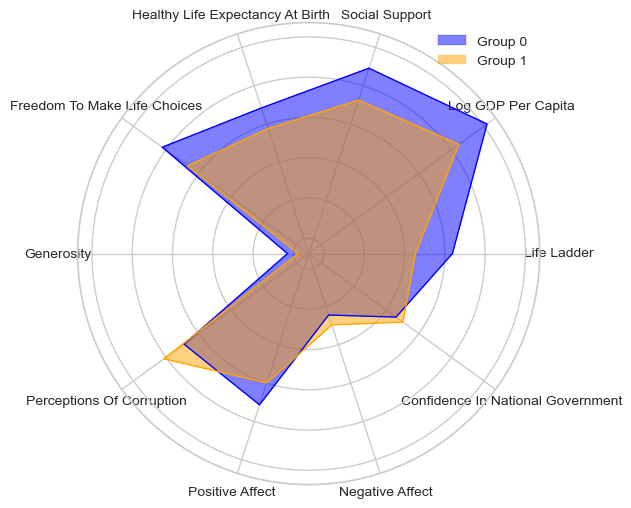

In [144]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values_0, color='blue', alpha=0.5,label= 'Group 0')
ax.plot(angles, values_0, color='blue', linewidth=1)

ax.fill(angles, values_1, color='orange', alpha=0.5,label= 'Group 1')
ax.plot(angles, values_1, color='orange', linewidth=1)


# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)


# Show the plot
plt.legend()
plt.show()


The spider chart above reinforces the feature comparisons and analysis above. We can see that the spider charts for our two groups
are rouhly the same shape, with Group 0 being characterized by higher scores across most metrics. The exceptions being Confidence in National Government and Perceptions of Corruption. As discussed above, the confidence in national government feature may be distorted in some way by the fact that the question wasn't asked for several countries, presumably because it was not safe or advisable to do so within the local political context. This means that some of the places where low scores might be expected did not have any data to share. If more data were collected from these places, it is reasonable to think that the scores for this feature would drop, bringing it more into line with the overall pattern. 

# KMeans Model - 5 clusters<a id='KMeans Model - 5 clusters'></a>

At the beginging of the notebook, the Elbow method was used to determine how many clusters to use as a parameter for the KMeans model. 
Both the  score and the silhouette score suggested 2 clusters as a good fit. That has been modeled and explored above.

The distortion score suggested 5 clusters as optimal. A 5 cluster model was explored using the same appraoch and feature comparisons as the 2 clusters detailed above. 

The results from 5 clusters were not nearly as clear cut as the 2 cluster model. As shown below, the various clusters had significant overlap 
in many of the key features, making it very difficult to distinguish meaningful differences or characteristics. 

Visualizations are shown below that illustrate this. We did not analyze the 5 clusters apprach in the same depth since the 2 clusters seemed to give overall better results.
Given the overlap in the 5 clusters model. It does not seem like a viable path to pursue. 

In [145]:
#Instantiate and fit the KMeans model 5 clusters

kmeans_5 = KMeans(n_clusters = 5,n_init='auto', random_state=42)
kmeans_5.fit(df_global_numerical_scaled)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [146]:
#Get the labels from the model and add them to our data set

labels_df = pd.DataFrame(kmeans_5.labels_, columns = ['Kmeans_group'])

df_global_KMeans_5_labeled = pd.concat([df_global,labels_df], axis= 1)

df_global_KMeans_5_labeled.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Kmeans_group
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,3
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,3
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,3
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,3
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,3


# 5 clusters - Basic Analysis<a id='5 clusters - Basic Analysis'></a>

In [147]:
#are any of the countries in more than one Kmeans_group?

countries_multi_labeled = []

for country in df_global_KMeans_5_labeled['Country Name'].unique():
    country_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Country Name']== country]
    labels = country_df['Kmeans_group'].unique()

    if len(labels) > 1: 
        countries_multi_labeled.append(country)

ratio = round((len(countries_multi_labeled)/len(df_global_KMeans_5_labeled['Country Name'].unique())*100),2)
print(f'{len(countries_multi_labeled)} countries or {ratio}% of the countries in the full data set have more than 1 label assigned with 5 clusters')

75 countries or 53.96% of the countries in the full data set have more than 1 label assigned with 5 clusters


In [148]:
labels = sorted(df_global_KMeans_5_labeled['Kmeans_group'].unique().tolist())

for label in labels:
    cluster_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']==label]
    print(f"Cluster {label}:")
    print(f"Mean Life Ladder: {np.mean(cluster_df['Life Ladder'], axis=0)}")
    print(f"Median Life Ladder: {np.median(cluster_df['Life Ladder'], axis=0)}")
    print(f"Mode Life Ladder: {mode(cluster_df['Life Ladder'], axis=0)[0]}")
    print(f"Size: {len(cluster_df)}")
    print()

Cluster 0:
Mean Life Ladder: 7.133939373527675
Median Life Ladder: 7.253757477
Mode Life Ladder: 5.137261868
Size: 271

Cluster 1:
Mean Life Ladder: 6.162269084787781
Median Life Ladder: 6.150487184499999
Mode Life Ladder: 4.10344696
Size: 622

Cluster 2:
Mean Life Ladder: 4.498436336534483
Median Life Ladder: 4.519449711
Mode Life Ladder: 2.693523169
Size: 348

Cluster 3:
Mean Life Ladder: 4.304803298273928
Median Life Ladder: 4.342079163
Mode Life Ladder: 2.375091791
Size: 303

Cluster 4:
Mean Life Ladder: 5.2072673426449505
Median Life Ladder: 5.18056345
Mode Life Ladder: 3.675108433
Size: 307



It's difficult to differentiate this many clusters without visualizations. But we can just from this that Cluster 1 is about double the size of the other clusters.
We can also see that  Cluster 2 and Cluster 3 seems to have almost the same central tendency when it comes to the target variable. 

In [149]:
#Look at clusters across all metrics

labels = sorted(df_global_KMeans_5_labeled['Kmeans_group'].unique().tolist())

for label in labels:
    cluster_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']==label]
    print(f"Cluster {label}:")
    print(f"Size: {len(cluster_df)}")
    print(f"Mean Life Ladder: {np.mean(cluster_df['Life Ladder'], axis=0)}")
    print(f"Mean Log GDP Per Capita: {np.mean(cluster_df['Log GDP Per Capita'], axis=0)}")
    print(f"Mean Social Support: {np.mean(cluster_df['Social Support'], axis=0)}")
    print(f"Mean Healthy Life Expectancy At Birth: {np.mean(cluster_df['Healthy Life Expectancy At Birth'], axis=0)}")
    print(f"Mean Freedom To Make Life Choices: {np.mean(cluster_df['Freedom To Make Life Choices'], axis=0)}")
    print(f"Mean Generosity: {np.mean(cluster_df['Generosity'], axis=0)}")
    print(f"Mean Perceptions Of Corruption: {np.mean(cluster_df['Perceptions Of Corruption'], axis=0)}")
    print(f"Mean Positive Affect: {np.mean(cluster_df['Positive Affect'], axis=0)}")
    print(f"Mean Negative Affect: {np.mean(cluster_df['Negative Affect'], axis=0)}")
    print(f"Mean Confidence In National Government: {np.mean(cluster_df['Confidence In National Government'], axis=0)}")
    print('\n')

Cluster 0:
Size: 271
Mean Life Ladder: 7.133939373527675
Mean Log GDP Per Capita: 10.906574189369005
Mean Social Support: 0.9311289814481089
Mean Healthy Life Expectancy At Birth: 71.21079491997659
Mean Freedom To Make Life Choices: 0.901986643380074
Mean Generosity: 0.16605823576705617
Mean Perceptions Of Corruption: 0.3869853918362901
Mean Positive Affect: 0.7358494601439114
Mean Negative Affect: 0.2082980211476015
Mean Confidence In National Government: 0.5871485342110494


Cluster 1:
Size: 622
Mean Life Ladder: 6.162269084787781
Mean Log GDP Per Capita: 9.874371556247588
Mean Social Support: 0.8763955202797428
Mean Healthy Life Expectancy At Birth: 67.35645899294997
Mean Freedom To Make Life Choices: 0.8085730469935691
Mean Generosity: -0.022536179545590628
Mean Perceptions Of Corruption: 0.7928886416382637
Mean Positive Affect: 0.7232542798713827
Mean Negative Affect: 0.2629671982090032
Mean Confidence In National Government: 0.4117675741756597


Cluster 2:
Size: 348
Mean Life Lad

Again we're seeing a lot of values more or less repeated across groups. Not easy to pick out charactieristics specific to any one group.

## 5 clusters - Visualization<a id='5 clusters - Visualization'></a>

In [152]:
group_0_5_clusters_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']== 0]
group_1_5_clusters_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']== 1]
group_2_5_clusters_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']== 2]
group_3_5_clusters_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']== 3]
group_4_5_clusters_df = df_global_KMeans_5_labeled[df_global_KMeans_5_labeled['Kmeans_group']== 4]

### 5 clusters - Life Ladder Comparison<a id=' 5 clusters - Life Ladder Comparison'></a>

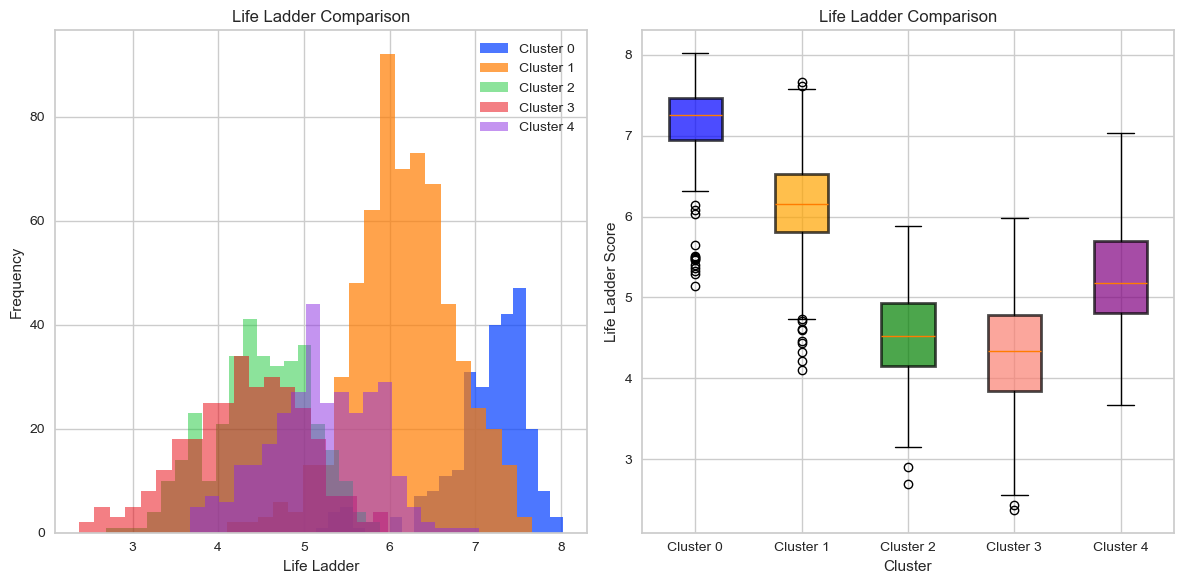

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(group_0_5_clusters_df['Life Ladder'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(group_1_5_clusters_df['Life Ladder'], bins=20, alpha=0.7, label = 'Cluster 1')
axes[0].hist(group_2_5_clusters_df['Life Ladder'], bins=20, alpha=0.5, label = 'Cluster 2')
axes[0].hist(group_3_5_clusters_df['Life Ladder'], bins=20, alpha=0.5, label = 'Cluster 3')
axes[0].hist(group_4_5_clusters_df['Life Ladder'], bins=20, alpha=0.5, label = 'Cluster 4')
    
axes[0].set_title(f'Life Ladder Comparison')
axes[0].set_xlabel('Life Ladder')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [group_0_5_clusters_df['Life Ladder'],
        group_1_5_clusters_df['Life Ladder'],
        group_2_5_clusters_df['Life Ladder'],
        group_3_5_clusters_df['Life Ladder'],
        group_4_5_clusters_df['Life Ladder']]


# Labels for each group
box_plot_labels = ['Cluster 0','Cluster 1' ,'Cluster 2','Cluster 3','Cluster 4']

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['blue','orange','green','salmon','purple']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Life Ladder Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Life Ladder Score')


plt.tight_layout()

plt.show()

In [156]:
#Descale the scaled data so that it's easier to visualize

descale = scaler.inverse_transform(df_global_numerical_scaled)

df_global_numerical_descaled = pd.DataFrame(descale, columns = ['Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'])

df_global_numerical_descaled.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [157]:
#Descale the cluster centers so that they can be plotted with the descaled data

cluster_centers_descaler = scaler.inverse_transform(kmeans_5.cluster_centers_)

cluster_centers_descaled = pd.DataFrame(cluster_centers_descaler, columns = ['Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'])

cluster_centers_descaled.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,7.133939,10.906574,0.931129,71.210795,0.901987,0.166058,0.386985,0.735849,0.208298,0.587149
1,6.162269,9.874372,0.876396,67.356459,0.808573,-0.022536,0.792889,0.723254,0.262967,0.411768
2,4.498436,8.218353,0.769733,55.523822,0.724088,0.035568,0.799234,0.669911,0.228120,0.603812
3,4.304803,8.041903,0.622843,55.899918,0.666332,0.015348,0.785249,0.562256,0.364680,0.551519
4,5.207267,9.728773,0.828274,65.190088,0.609996,-0.129832,0.868912,0.552841,0.282846,0.311357


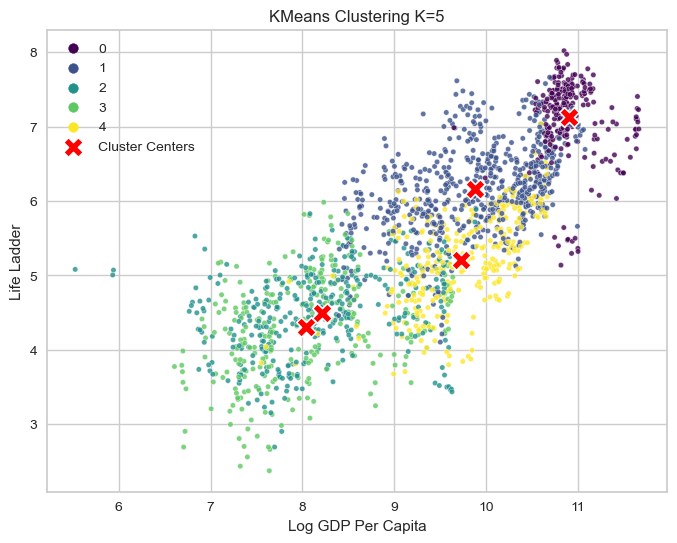

In [158]:
'''Life Ladder	Log GDP Per Capita	Social Support	Healthy Life Expectancy At Birth	Freedom To Make Life Choices	Generosity	Perceptions Of Corruption	Positive Affect	Negative Affect	Confidence In National Government'''


plt.figure(figsize=(8, 6))

# Scatter plot of data points with colors representing clusters
sns.scatterplot(x=df_global_numerical_descaled['Log GDP Per Capita'], y=df_global_numerical_descaled['Life Ladder'], hue=kmeans_5.labels_, palette='viridis', s=15, alpha=0.8)
#sns.scatterplot(x=descale[:, 0], y=descale[:, 1], hue=kmeans.labels_, palette='viridis', s=15, alpha=0.8)

# Plot cluster centers
sns.scatterplot(x=cluster_centers_descaled['Log GDP Per Capita'], y=cluster_centers_descaled['Life Ladder'],
                color='red', marker='X', s=200, label='Cluster Centers')

plt.title('KMeans Clustering K=5')
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()

As we did above with 2 clusters, we're using a scatter plot to look at the major feature and how it interacts with the target variable. 
There is a pretty tight cluster at the top right (Cluster 0) but the rest of the plot is pretty muddy. We'll try to look at things in 3-d below to see if adding another major feature provides any additional clarity.

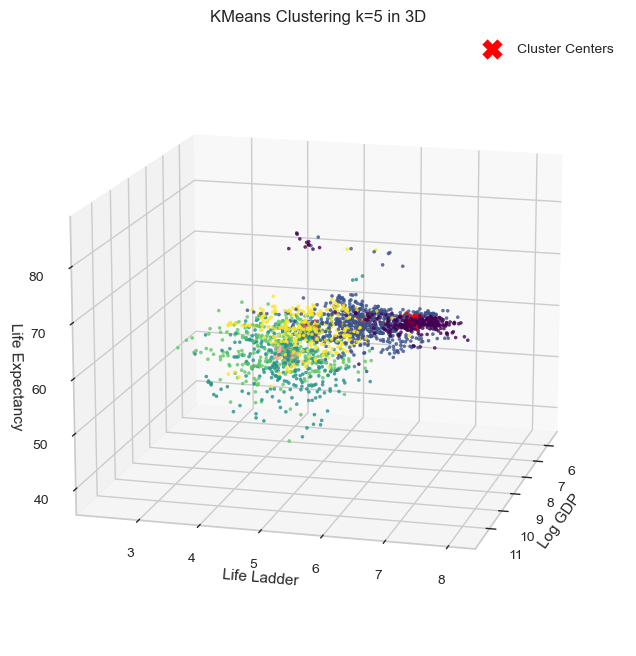

In [179]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points with colors representing clusters
scatter = ax.scatter(df_global_numerical_descaled['Log GDP Per Capita'], df_global_numerical_descaled['Life Ladder'],df_global_numerical_descaled['Healthy Life Expectancy At Birth'], c=kmeans_5.labels_,cmap='viridis', s=5, alpha=0.8)

# Plot cluster centers
ax.scatter(cluster_centers_descaled['Log GDP Per Capita'], cluster_centers_descaled['Life Ladder'], cluster_centers_descaled['Healthy Life Expectancy At Birth'],
           color='red', marker='X', s=200, label='Cluster Centers')

# Add labels and title
ax.set_xlabel('Log GDP')
ax.set_ylabel('Life Ladder')
ax.set_zlabel('Life Expectancy')
ax.set_title('KMeans Clustering k=5 in 3D')
ax.legend()

ax.view_init(elev=15, azim=15)  

# Show the plot
plt.show()

Still pretty confused except for Cluster 0, which is at the top range of these 3 metrics. 
This would be the wealthiest countries with the longest life expectancy and the highest life ladder scores.
What if we add some interaction to the plot? 

In [181]:
import plotly.express as px

fig = px.scatter_3d(df_global_KMeans_5_labeled, x='Log GDP Per Capita', y='Life Ladder', z='Healthy Life Expectancy At Birth',
                    color='Kmeans_group', opacity=0.7, size_max=1)

# Set layout parameters for better interactivity
fig.update_layout(scene=dict(aspectmode='cube', xaxis=dict(title='Log GDP'),
                             yaxis=dict(title='Life Ladder'), zaxis=dict(title='Life Expectancy')),
                             margin=dict(l=0, r=0, b=0, t=0))

# Show the plot
fig.show()

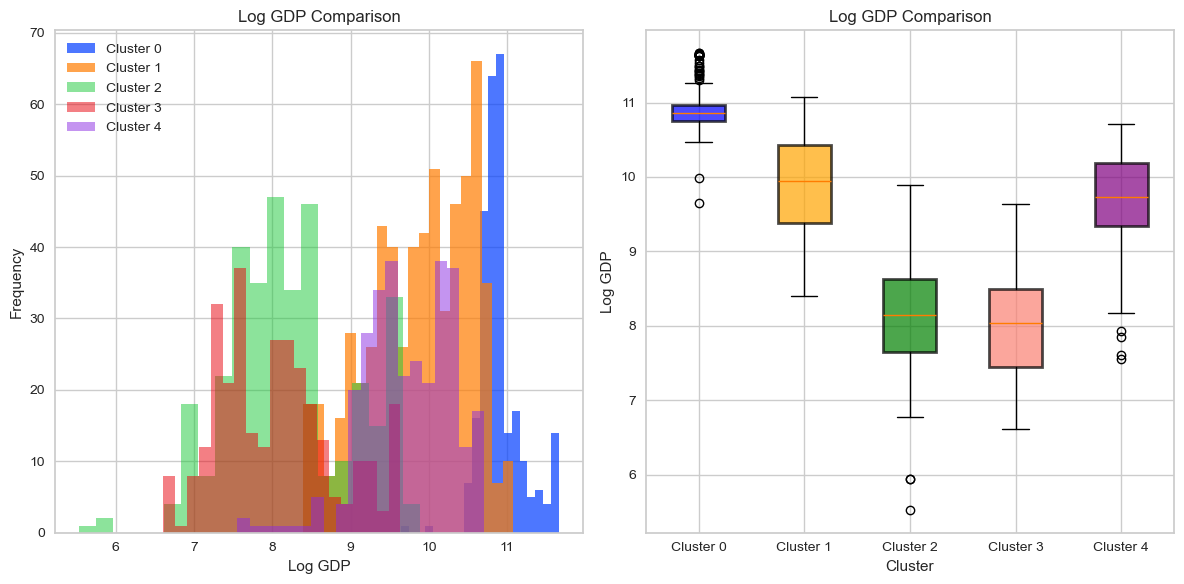

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(group_0_5_clusters_df['Log GDP Per Capita'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(group_1_5_clusters_df['Log GDP Per Capita'], bins=20, alpha=0.7, label = 'Cluster 1')
axes[0].hist(group_2_5_clusters_df['Log GDP Per Capita'], bins=20, alpha=0.5, label = 'Cluster 2')
axes[0].hist(group_3_5_clusters_df['Log GDP Per Capita'], bins=20, alpha=0.5, label = 'Cluster 3')
axes[0].hist(group_4_5_clusters_df['Log GDP Per Capita'], bins=20, alpha=0.5, label = 'Cluster 4')
    
axes[0].set_title('Log GDP Comparison')
axes[0].set_xlabel('Log GDP')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [group_0_5_clusters_df['Log GDP Per Capita'],
        group_1_5_clusters_df['Log GDP Per Capita'],
        group_2_5_clusters_df['Log GDP Per Capita'],
        group_3_5_clusters_df['Log GDP Per Capita'],
        group_4_5_clusters_df['Log GDP Per Capita']]


# Labels for each group
box_plot_labels = ['Cluster 0','Cluster 1' ,'Cluster 2','Cluster 3','Cluster 4']

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['blue','orange','green','salmon','purple']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Log GDP Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log GDP')


plt.tight_layout()

plt.show()

In this plot, and in the other examining the major features of the dataset we see strong overlap between the groups. 
Cluster 0 is at the top, and the other clusters sahre very close scores, making it difficult to distinguish what separates one from the other. 

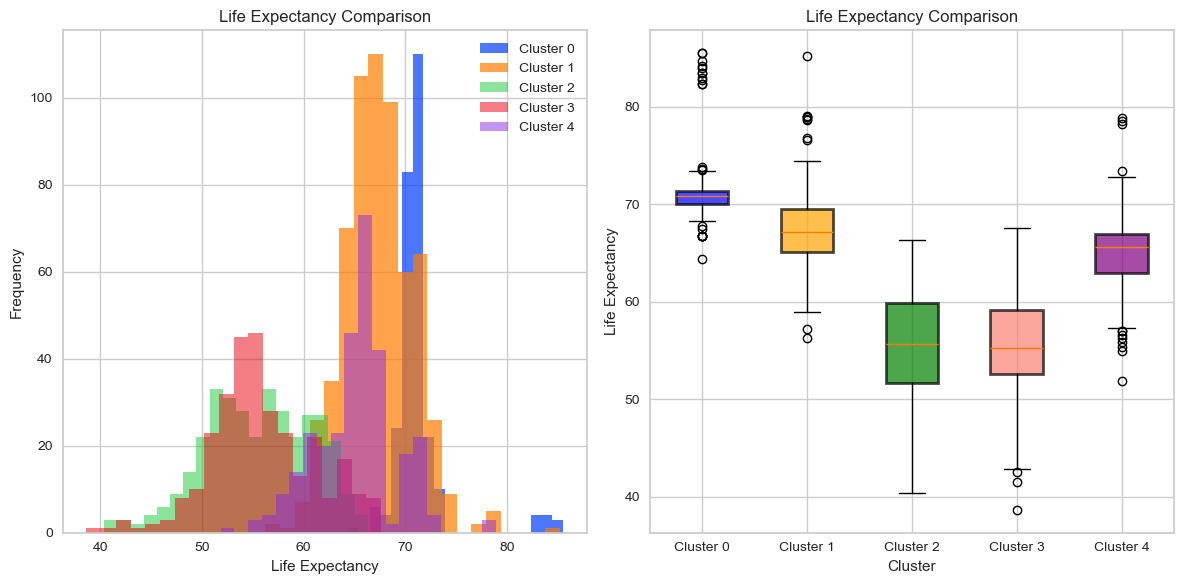

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(group_0_5_clusters_df['Healthy Life Expectancy At Birth'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(group_1_5_clusters_df['Healthy Life Expectancy At Birth'], bins=20, alpha=0.7, label = 'Cluster 1')
axes[0].hist(group_2_5_clusters_df['Healthy Life Expectancy At Birth'], bins=20, alpha=0.5, label = 'Cluster 2')
axes[0].hist(group_3_5_clusters_df['Healthy Life Expectancy At Birth'], bins=20, alpha=0.5, label = 'Cluster 3')
axes[0].hist(group_4_5_clusters_df['Healthy Life Expectancy At Birth'], bins=20, alpha=0.5, label = 'Cluster 4')
    
axes[0].set_title(f'Life Expectancy Comparison')
axes[0].set_xlabel('Life Expectancy')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [group_0_5_clusters_df['Healthy Life Expectancy At Birth'],
        group_1_5_clusters_df['Healthy Life Expectancy At Birth'],
        group_2_5_clusters_df['Healthy Life Expectancy At Birth'],
        group_3_5_clusters_df['Healthy Life Expectancy At Birth'],
        group_4_5_clusters_df['Healthy Life Expectancy At Birth']]


# Labels for each group
box_plot_labels = ['Cluster 0','Cluster 1' ,'Cluster 2','Cluster 3','Cluster 4']

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['blue','orange','green','salmon','purple']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Life Expectancy Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Life Expectancy')


plt.tight_layout()

plt.show()

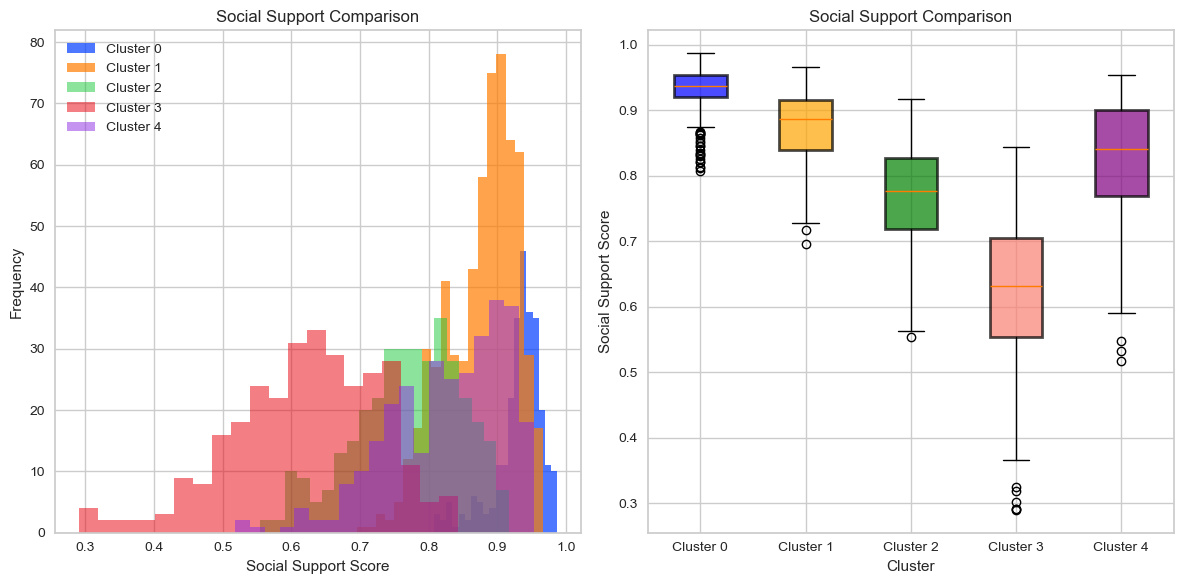

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(group_0_5_clusters_df['Social Support'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(group_1_5_clusters_df['Social Support'], bins=20, alpha=0.7, label = 'Cluster 1')
axes[0].hist(group_2_5_clusters_df['Social Support'], bins=20, alpha=0.5, label = 'Cluster 2')
axes[0].hist(group_3_5_clusters_df['Social Support'], bins=20, alpha=0.5, label = 'Cluster 3')
axes[0].hist(group_4_5_clusters_df['Social Support'], bins=20, alpha=0.5, label = 'Cluster 4')
    
axes[0].set_title(f'Social Support Comparison')
axes[0].set_xlabel('Social Support Score')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [group_0_5_clusters_df['Social Support'],
        group_1_5_clusters_df['Social Support'],
        group_2_5_clusters_df['Social Support'],
        group_3_5_clusters_df['Social Support'],
        group_4_5_clusters_df['Social Support']]


# Labels for each group
box_plot_labels = ['Cluster 0','Cluster 1' ,'Cluster 2','Cluster 3','Cluster 4']

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['blue','orange','green','salmon','purple']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Social Support Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Social Support Score')


plt.tight_layout()

plt.show()

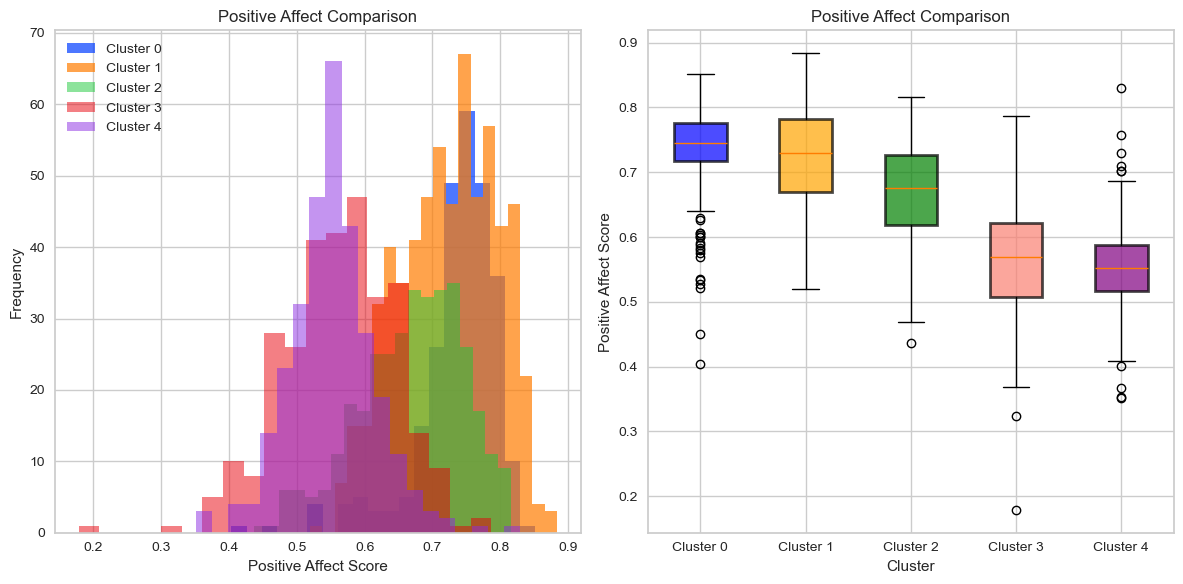

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
axes[0].hist(group_0_5_clusters_df['Positive Affect'], bins=20, alpha=0.7, label = 'Cluster 0')
axes[0].hist(group_1_5_clusters_df['Positive Affect'], bins=20, alpha=0.7, label = 'Cluster 1')
axes[0].hist(group_2_5_clusters_df['Positive Affect'], bins=20, alpha=0.5, label = 'Cluster 2')
axes[0].hist(group_3_5_clusters_df['Positive Affect'], bins=20, alpha=0.5, label = 'Cluster 3')
axes[0].hist(group_4_5_clusters_df['Positive Affect'], bins=20, alpha=0.5, label = 'Cluster 4')
    
axes[0].set_title(f'Positive Affect Comparison')
axes[0].set_xlabel('Positive Affect Score')
axes[0].set_ylabel('Frequency')

axes[0].legend()

#Plot Boxplot
box_plot_data = [group_0_5_clusters_df['Positive Affect'],
        group_1_5_clusters_df['Positive Affect'],
        group_2_5_clusters_df['Positive Affect'],
        group_3_5_clusters_df['Positive Affect'],
        group_4_5_clusters_df['Positive Affect']]


# Labels for each group
box_plot_labels = ['Cluster 0','Cluster 1' ,'Cluster 2','Cluster 3','Cluster 4']

# Creating the box plot with colors
boxplot = axes[1].boxplot(box_plot_data, labels=box_plot_labels, patch_artist = True)

box_colors = ['blue','orange','green','salmon','purple']  # Colors for each box
for i, box in enumerate(boxplot['boxes']):
    box.set(color='black', linewidth=2, alpha = 0.7)
    box.set(facecolor=box_colors[i])

# Adding title and labels
axes[1].set_title(f'Positive Affect Comparison')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Positive Affect Score')


plt.tight_layout()

plt.show()